In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

### 1. Load data

In [2]:
dpath = Path("../../py_data/HEXPractice/disHEX")
l_hex = 6.1
n_hex = 100
ks = [1, 50, 100, 150, 200]
nk = len(ks)

'''
mode:
cinlet: constant inlents
rinlet: random inlents
'''
mode = "rinlet"

# f_type: 0 - parallel flow, 1 - counter flow
f_type = 1

if f_type == 0:
    dfs = pd.read_csv(f"{dpath}/{mode}/parallel.csv", header=0)
    for k in ks:
        exec(f'df_day{k} = pd.read_csv("{dpath}/{mode}/parallel_day_{k}.csv", header=0)')
elif f_type == 1:
    dfs = pd.read_csv(f"{dpath}/{mode}/counter.csv", header=0)
    for k in ks:
        exec(f'df_day{k} = pd.read_csv("{dpath}/{mode}/counter_day_{k}.csv", header=0)')

In [3]:
dfs.head()

,Day,F1m,F1i,F1o,F1v,F1D,F1Re,F1Nu,F1h,F1Cf,...,F2D,F2Re,F2h,F2Cf,F2Tau,dP2,Sigma2,Rf2,UA,Q
0,1,0.296048,481.957392,495.947221,0.264261,0.045800,3025.785391,74.897687,196.238481,0.012713,...,0.0492,4484.132132,485.537435,0.011325,0.037258,4.619340,0.0,0.0,126.130039,12077.090131
1,2,0.302427,488.699271,499.545041,0.270876,0.045722,3096.250902,76.289861,200.227008,0.012625,...,0.0492,4843.114647,516.392349,0.011079,0.042518,5.271570,0.0,0.0,126.290354,9564.631783
2,3,0.297270,494.906269,512.238864,0.267126,0.045648,3048.419994,75.345574,198.071098,0.012684,...,0.0492,4304.300066,469.896306,0.011459,0.034735,4.306601,0.0,0.0,119.061248,15024.588336
3,4,0.283579,513.692727,527.152291,0.255966,0.045546,2914.529836,72.686325,191.508336,0.012857,...,0.0492,4481.759950,485.331938,0.011327,0.037224,4.615153,0.0,0.0,113.218823,11129.921045
4,5,0.321189,499.084951,504.424947,0.291365,0.045432,3309.327443,80.461791,212.524218,0.012376,...,0.0492,4881.596303,519.672204,0.011054,0.043100,5.343678,0.0,0.0,118.484584,5001.376417


In [4]:
days = dfs["Day"].to_numpy()

### 2. Plots of data (overall or average) vs. days

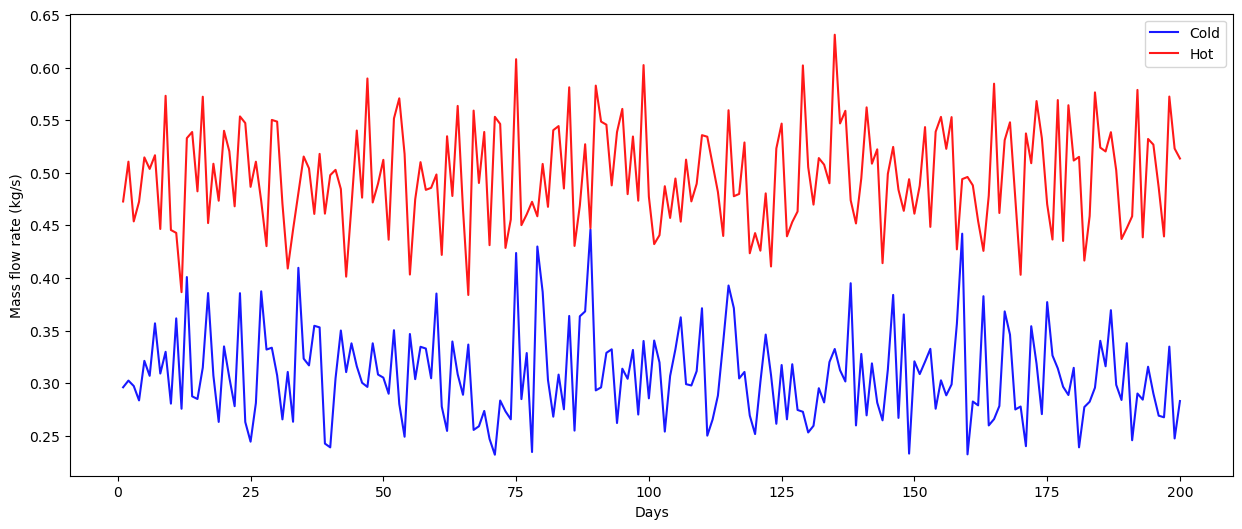

In [5]:
# mass flow vs. time
fig, ax = plt.subplots()
fig.set_figheight(6)
fig.set_figwidth(15)
ax.plot(days, dfs["F1m"].to_numpy(), c="blue", alpha=0.9, label="Cold")
ax.plot(days, dfs["F2m"].to_numpy(), c="r", alpha=0.9, label="Hot")
ax.set_ylabel("Mass flow rate (kg/s)")
ax.set_xlabel("Days")
ax.legend(loc="upper right")
plt.show()

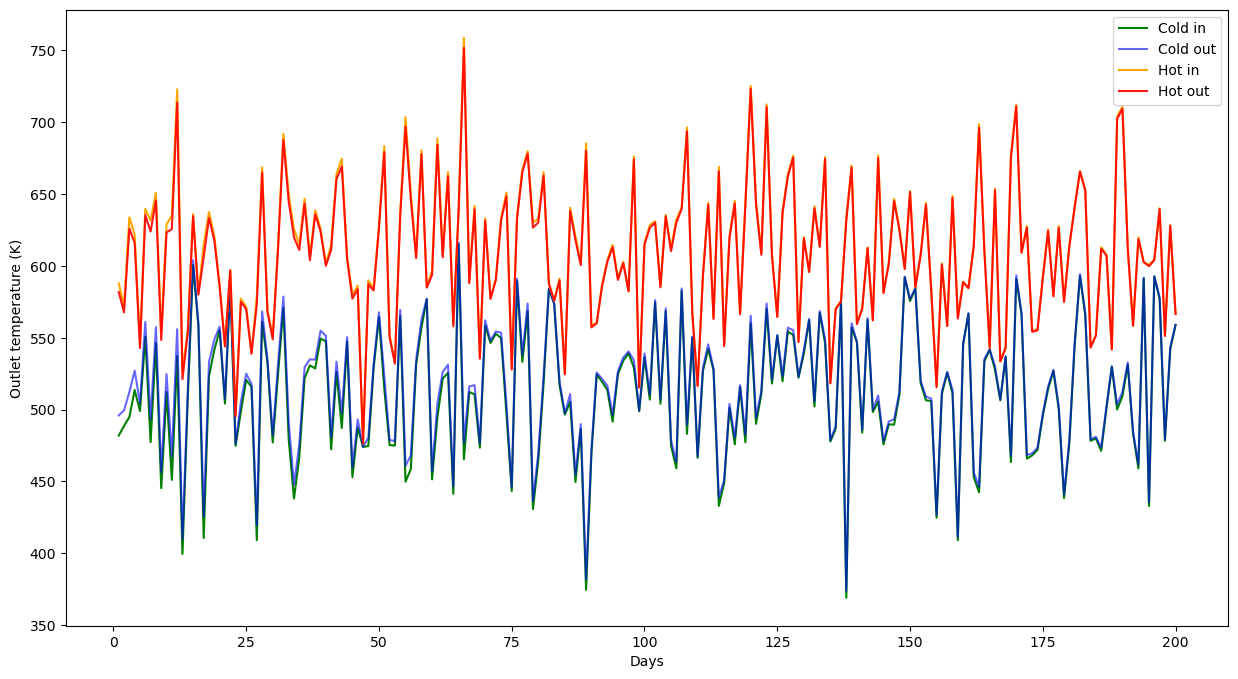

In [6]:
# outlet temperatures vs. time
fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(15)
ax.plot(days, dfs["F1i"].to_numpy(), c="green", label="Cold in")
ax.plot(days, dfs["F1o"].to_numpy(), c="blue", alpha=0.6, label="Cold out")
ax.plot(days, dfs["F2i"].to_numpy(), c="orange", label="Hot in")
ax.plot(days, dfs["F2o"].to_numpy(), c="r", alpha=0.9, label="Hot out")
ax.set_ylabel("Outlet temperature (K)")
ax.set_xlabel("Days")
ax.legend(loc="upper right")
plt.show()


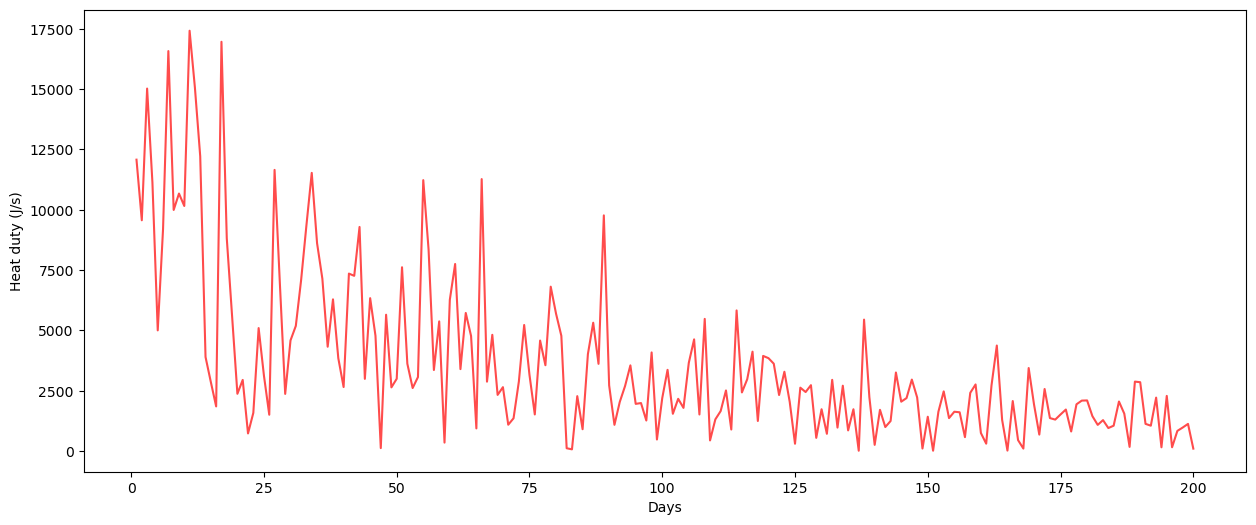

In [7]:
# Heat duty vs. time
plt.figure(figsize=(15, 6))
plt.plot(days, dfs["Q"].to_numpy(), c="r", alpha=0.7)
plt.ylabel("Heat duty (J/s)")
plt.xlabel("Days")
plt.show()

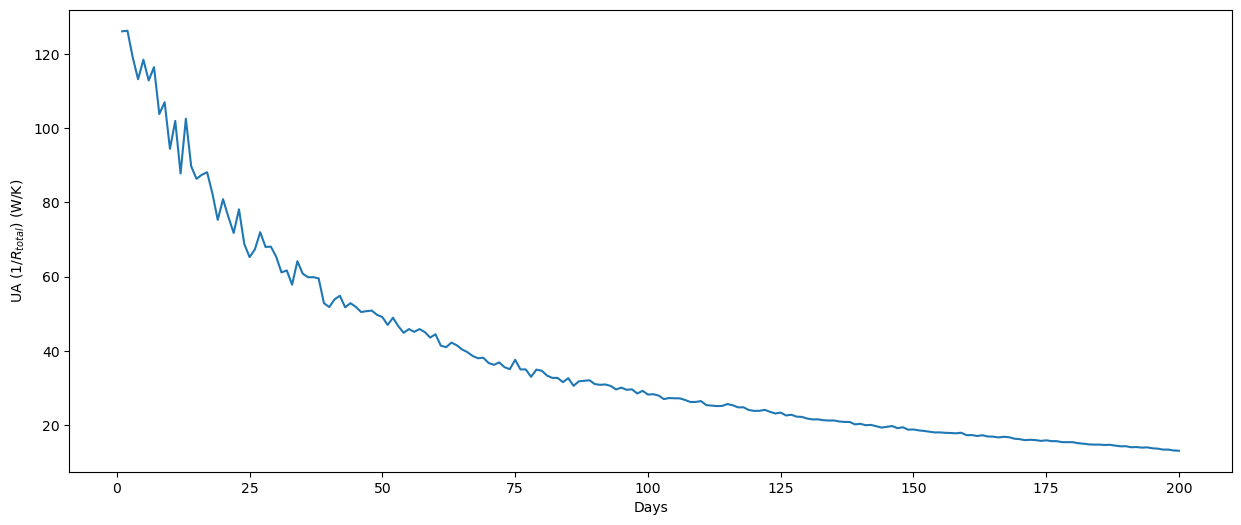

In [8]:
# UA vs. time
plt.figure(figsize=(15, 6))
plt.plot(days, dfs["UA"].to_numpy())
plt.ylabel("UA (1/$R_{total}$) (W/K)")
plt.xlabel("Days")
plt.show()

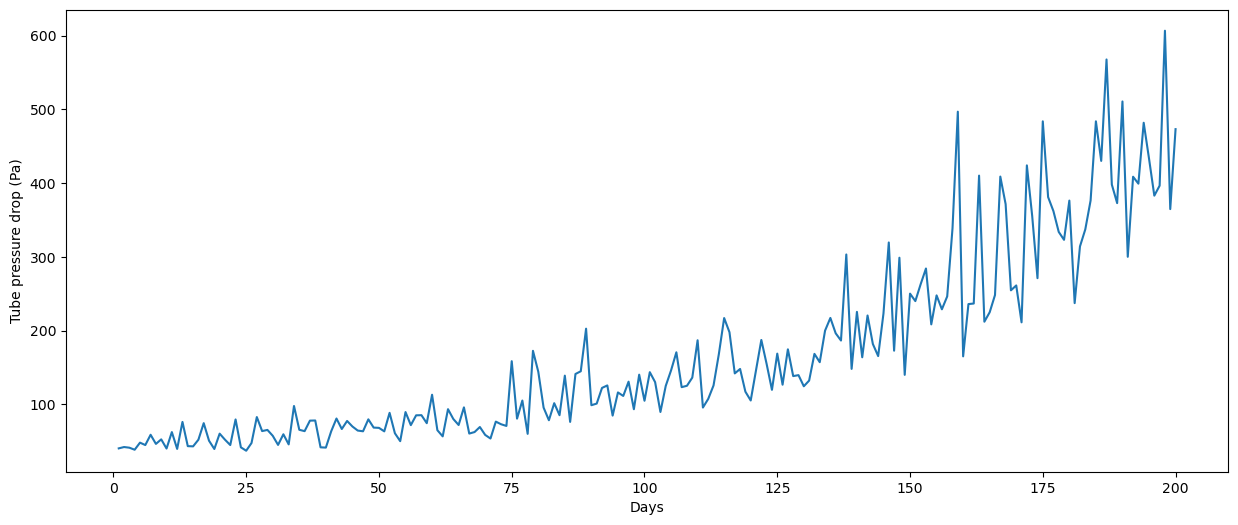

In [9]:
# dP vs. time
plt.figure(figsize=(15, 6))
plt.plot(days, dfs["dP1"].to_numpy())
plt.ylabel("Tube pressure drop (Pa)")
plt.xlabel("Days")
plt.show()

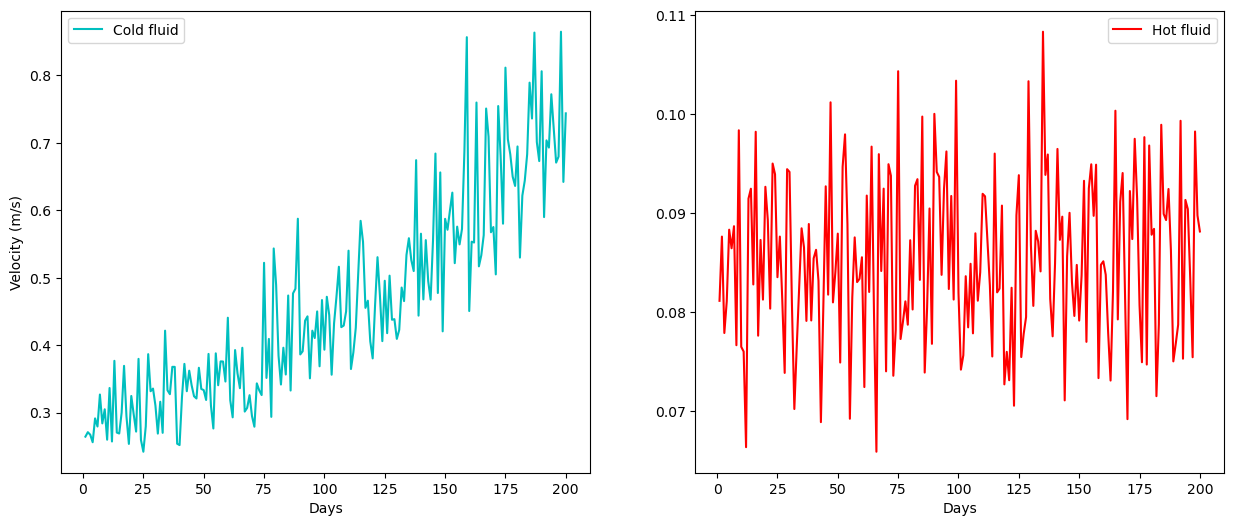

In [10]:
# Velocity vs. time
fig, ax = plt.subplots(1, 2)
fig.set_figheight(6)
fig.set_figwidth(15)
ax[0].plot(days, dfs["F1v"].to_numpy(), c="c", label="Cold fluid")
ax[1].plot(days, dfs["F2v"].to_numpy(), c="r", label="Hot fluid")
ax[0].set_ylabel("Velocity (m/s)")
ax[0].set_xlabel("Days")
ax[1].set_xlabel("Days")
ax[0].legend()
ax[1].legend()
plt.show()


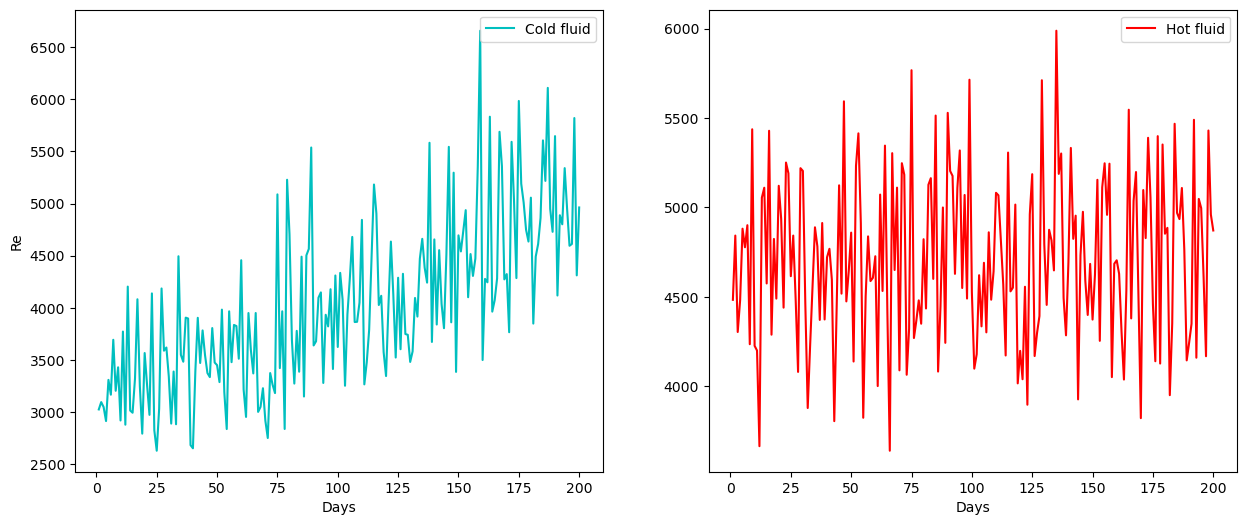

In [11]:
# Re vs. time
fig, ax = plt.subplots(1, 2)
fig.set_figheight(6)
fig.set_figwidth(15)
ax[0].plot(days, dfs["F1Re"].to_numpy(), c="c", label="Cold fluid")
ax[1].plot(days, dfs["F2Re"].to_numpy(), c="r", label="Hot fluid")
ax[0].set_ylabel("Re")
ax[0].set_xlabel("Days")
ax[1].set_xlabel("Days")
ax[0].legend()
ax[1].legend()
plt.show()


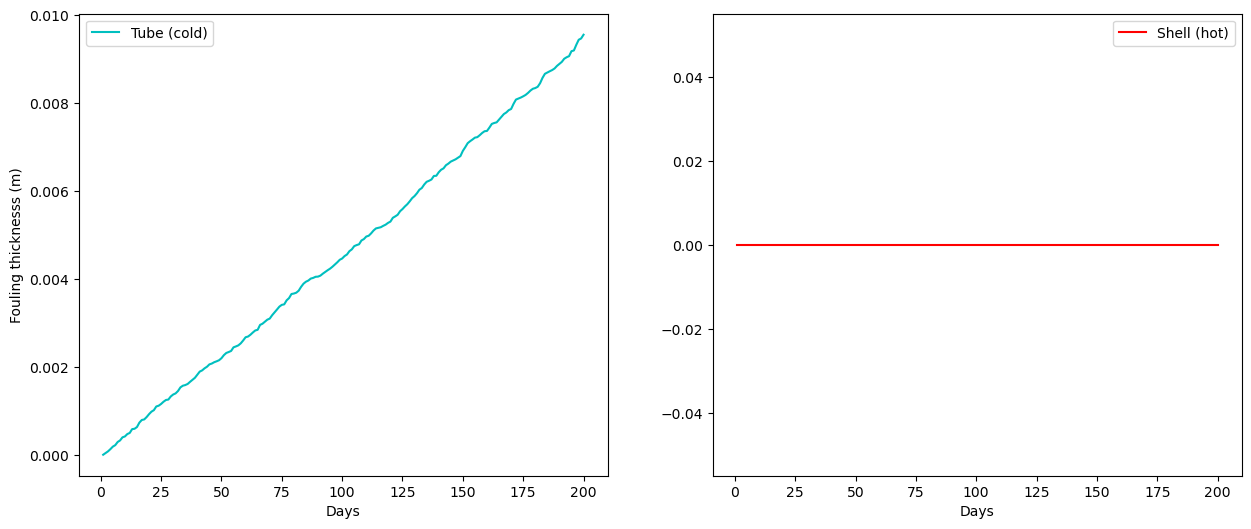

In [12]:
# Fouling thickness vs. time
fig, ax = plt.subplots(1, 2)
fig.set_figheight(6)
fig.set_figwidth(15)
ax[0].plot(days, dfs["Sigma1"].to_numpy(), c="c", label="Tube (cold)")
ax[1].plot(days, dfs["Sigma2"].to_numpy(), c="r", label="Shell (hot)")
ax[0].set_ylabel("Fouling thicknesss (m)")
ax[0].set_xlabel("Days")
ax[1].set_xlabel("Days")
ax[0].legend()
ax[1].legend()
plt.show()

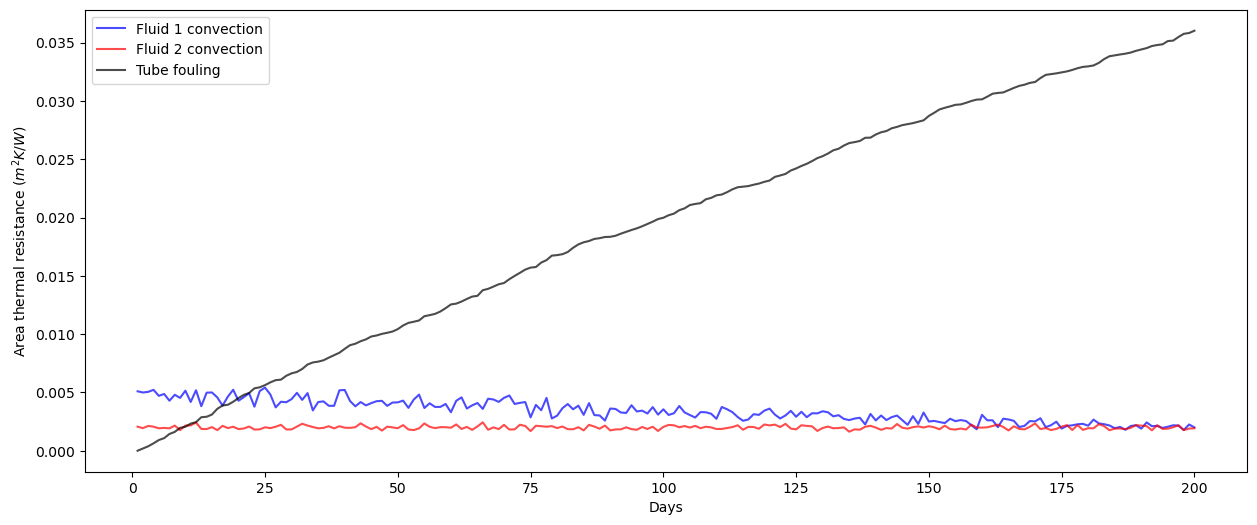

In [13]:
# Resistances vs. time
plt.figure(figsize=(15, 6))
plt.plot(days, 1 / dfs["F1h"].to_numpy(), c="b", alpha=0.7, label="Fluid 1 convection")
plt.plot(days, 1 / dfs["F2h"].to_numpy(), c="r", alpha=0.7, label="Fluid 2 convection")
plt.plot(days, dfs["Rf1"].to_numpy(), c="black", alpha=0.7, label="Tube fouling")
plt.ylabel("Area thermal resistance ($m^2 K/W$)")
plt.xlabel("Days")
plt.legend()
plt.show()

### 2. Plots of data vs. HEX distance of specific days

In [14]:
x = [i * l_hex / n_hex for i in range(n_hex)]

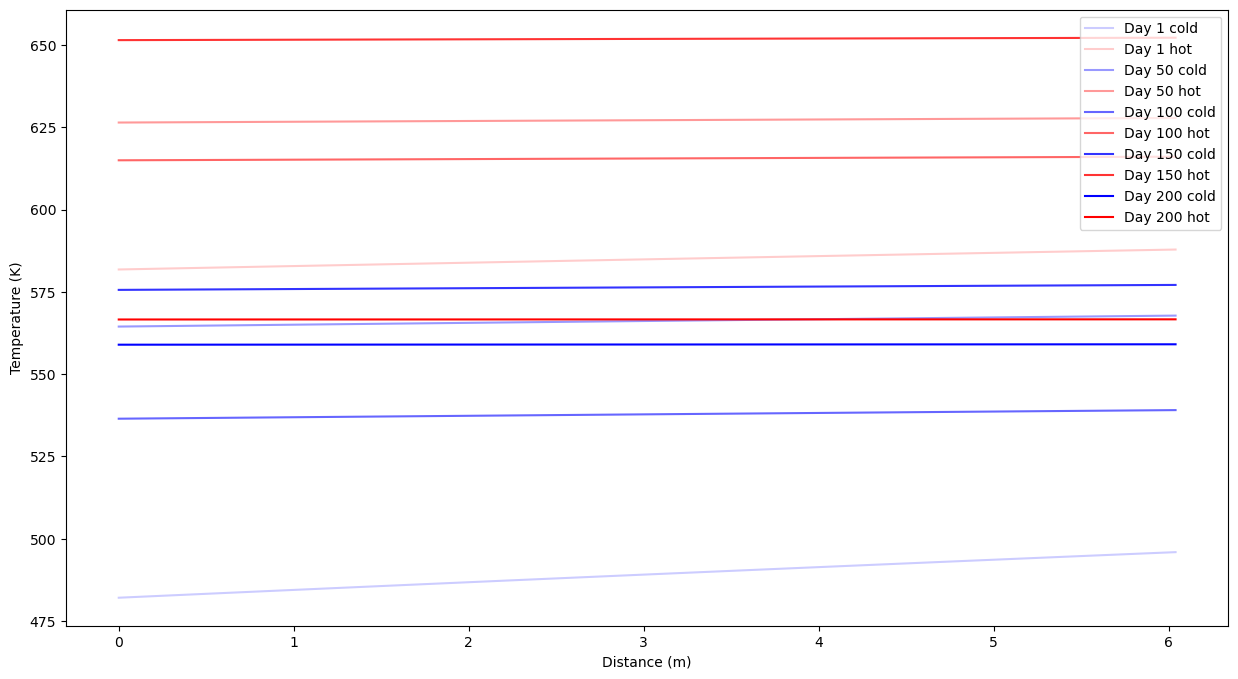

In [15]:
# temperatures vs. distance
fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(15)

for k, i in zip(ks, range(1, nk + 1)):
    exec(f'ax.plot(x, df_day{k}["F1T"].to_numpy(), c="blue", alpha={1 / nk * i}, label="Day {k} cold")')
    exec(f'ax.plot(x, df_day{k}["F2T"].to_numpy(), c="red", alpha={1 / nk * i}, label="Day {k} hot")')
ax.set_ylabel("Temperature (K)")
ax.set_xlabel("Distance (m)")
ax.legend(loc="upper right")
plt.show()

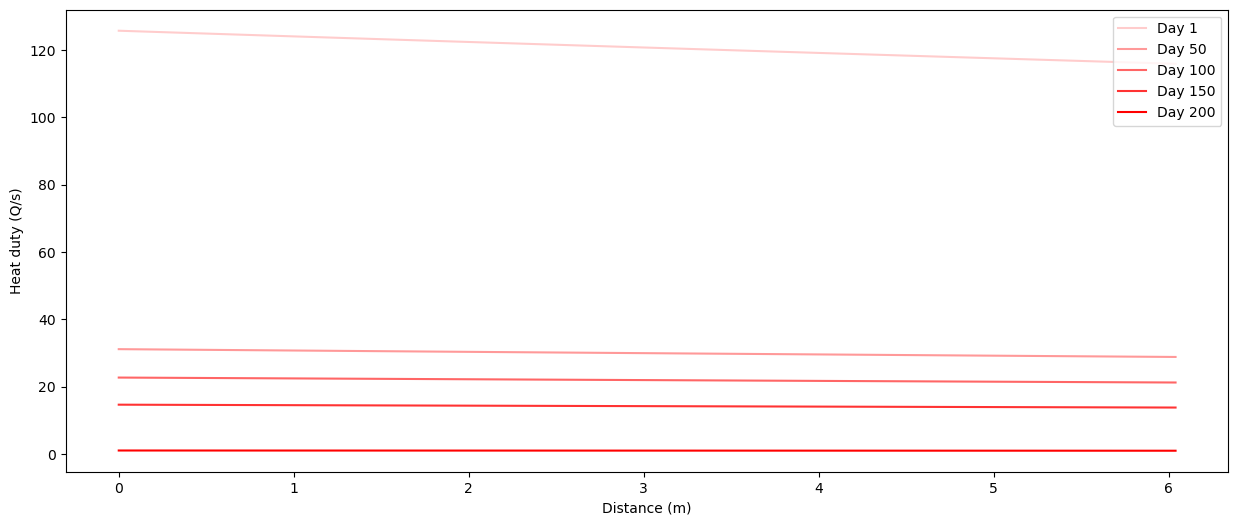

In [16]:
# heat duty vs. distance
fig, ax = plt.subplots()
fig.set_figheight(6)
fig.set_figwidth(15)

for k, i in zip(ks, range(1, nk + 1)):
    exec(f'ax.plot(x, df_day{k}["Q"].to_numpy(), c="r", alpha={1 / nk * i}, label="Day {k}")')
ax.set_ylabel("Heat duty (Q/s)")
ax.set_xlabel("Distance (m)")
ax.legend(loc="upper right")
plt.show()

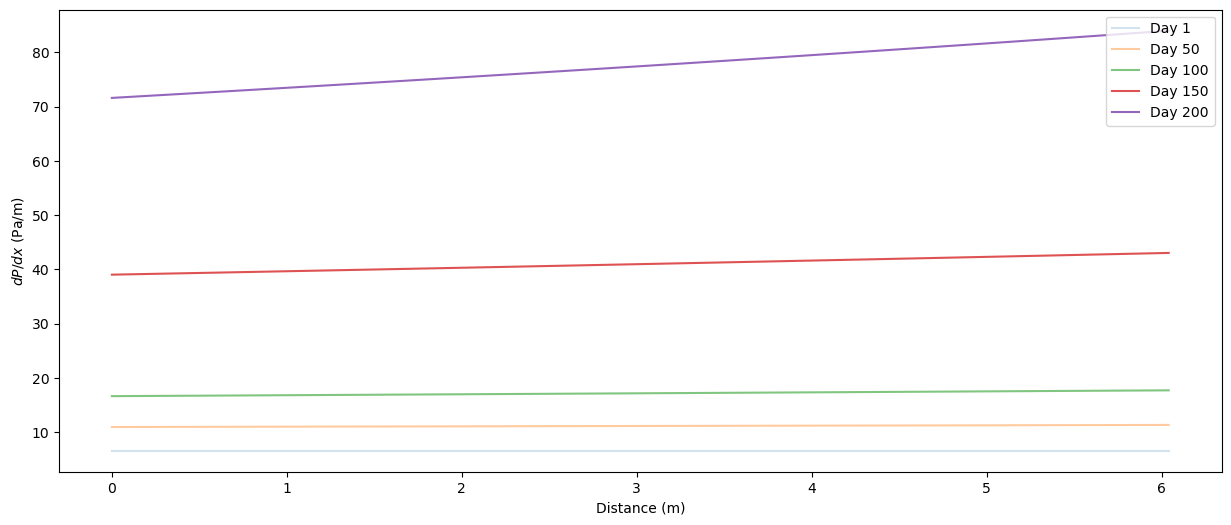

In [17]:
# pressure drop vs. distance
fig, ax = plt.subplots()
fig.set_figheight(6)
fig.set_figwidth(15)

for k, i in zip(ks, range(1, nk + 1)):
    exec(f'ax.plot(x, df_day{k}["dP1/dx"].to_numpy(), alpha={1 / nk * i}, label="Day {k}")')
ax.set_ylabel("$dP/dx$ (Pa/m)")
ax.set_xlabel("Distance (m)")
ax.legend(loc="upper right")
plt.show()

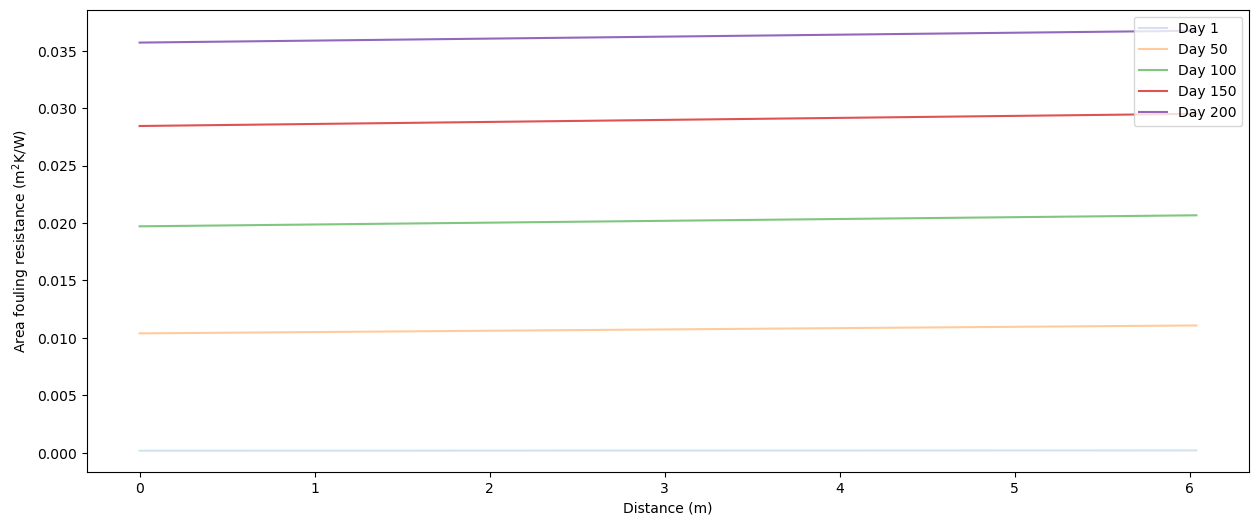

In [18]:
# fouling resistance vs. distance
fig, ax = plt.subplots()
fig.set_figheight(6)
fig.set_figwidth(15)

for k, i in zip(ks, range(1, nk + 1)):
    exec(f'ax.plot(x, df_day{k}["Rf1"].to_numpy(), alpha={1 / nk * i}, label="Day {k}")')
ax.set_ylabel("Area fouling resistance (m$^2$K/W)")
ax.set_xlabel("Distance (m)")
ax.legend(loc="upper right")
plt.show()

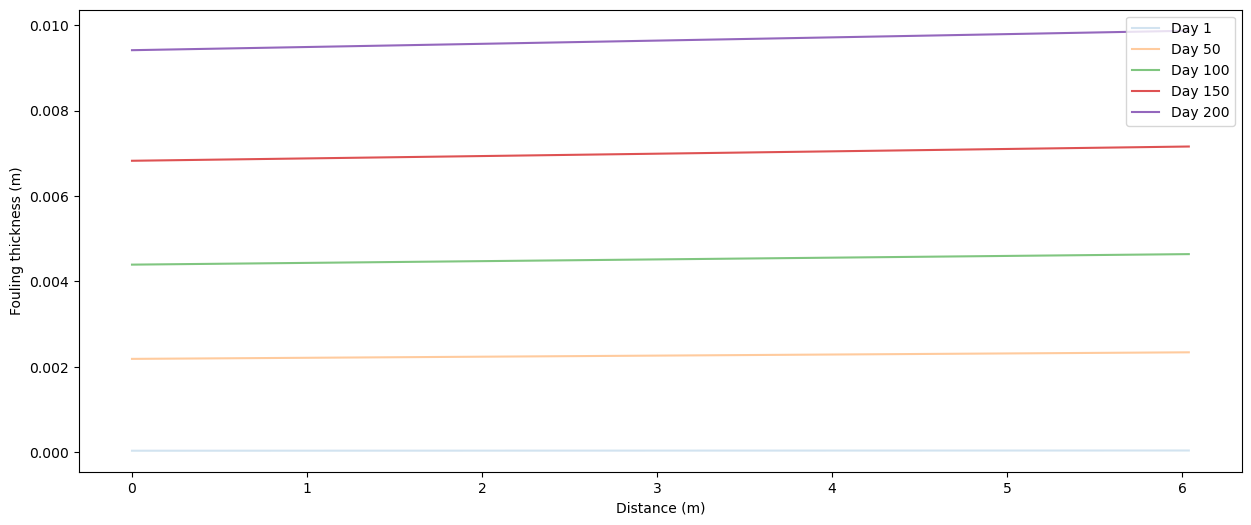

In [19]:
# fouling thickness vs. distance
fig, ax = plt.subplots()
fig.set_figheight(6)
fig.set_figwidth(15)

for k, i in zip(ks, range(1, nk + 1)):
    exec(f'ax.plot(x, df_day{k}["Sigma1"].to_numpy(), alpha={1 / nk * i}, label="Day {k}")')
ax.set_ylabel("Fouling thickness (m)")
ax.set_xlabel("Distance (m)")
ax.legend(loc="upper right")
plt.show()

### 3. Compare lumped result with distributed one

In [20]:
spath1 = Path(f"{dpath}/../lumpHEX/{mode}")
if f_type == 0:
    df1 = pd.read_csv(f"{spath1}/parallel.csv", header=0)
elif f_type == 1:
    df1 = pd.read_csv(f"{spath1}/counter.csv", header=0)

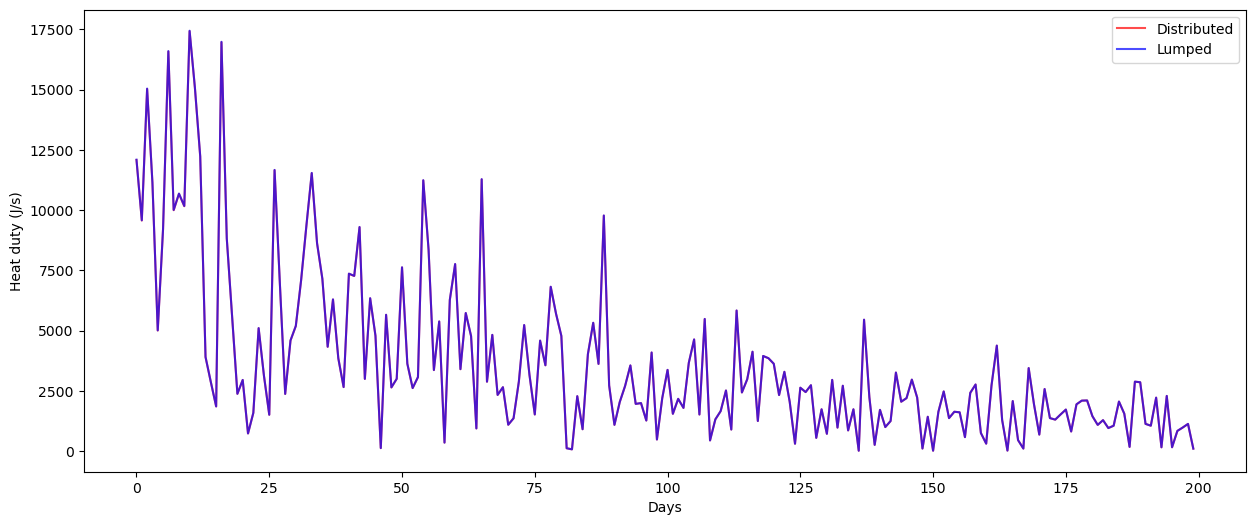

In [21]:
# Heat duty vs. time
plt.figure(figsize=(15, 6))
plt.plot(dfs["Q"].to_numpy(), c="r", alpha=0.7, label="Distributed")
plt.plot(df1["Q"].to_numpy(), c="b", alpha=0.7, label="Lumped")
plt.ylabel("Heat duty (J/s)")
plt.xlabel("Days")
plt.legend()
plt.show()

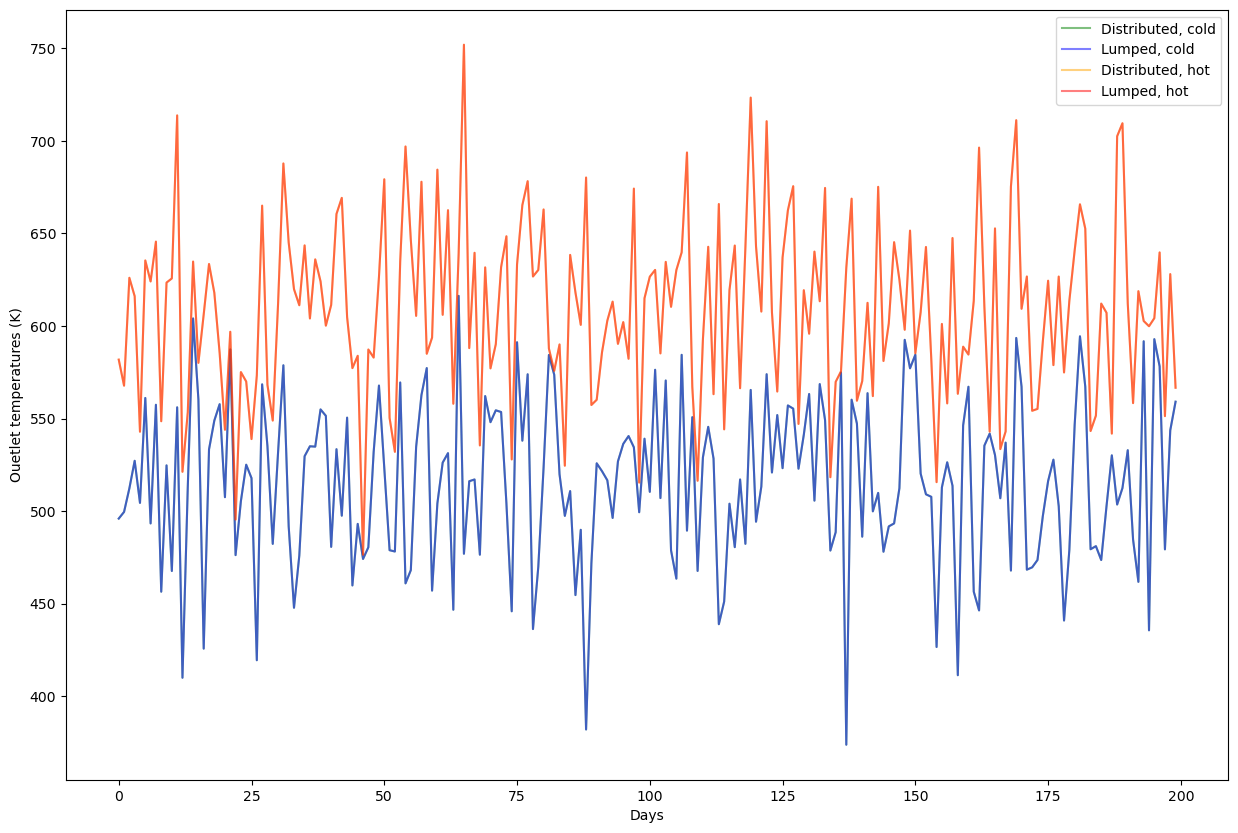

In [22]:
# Outlet temperature vs. time
plt.figure(figsize=(15, 10))
plt.plot(dfs["F1o"].to_numpy(), c="green", alpha=0.5, label="Distributed, cold")
plt.plot(df1["F1o"].to_numpy(), c="blue", alpha=0.5, label="Lumped, cold")

plt.plot(dfs["F2o"].to_numpy(), c="orange", alpha=0.5, label="Distributed, hot")
plt.plot(df1["F2o"].to_numpy(), c="red", alpha=0.5, label="Lumped, hot")
plt.ylabel("Ouetlet temperatures (K)")
plt.xlabel("Days")
plt.legend()
plt.show()

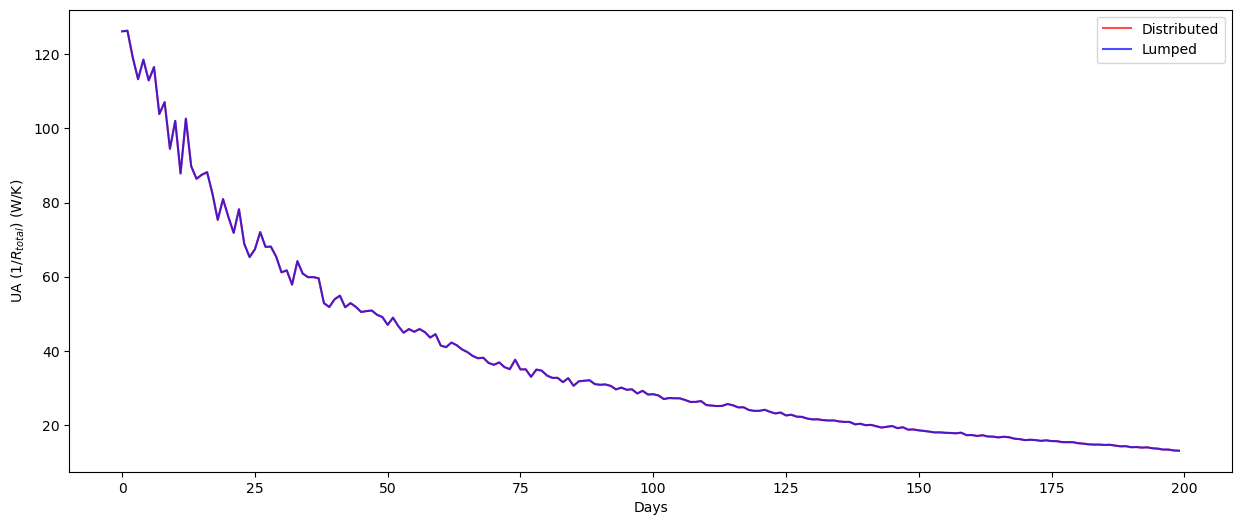

In [23]:
# UA vs. time, lumped should be about 100 times
plt.figure(figsize=(15, 6))
plt.plot(dfs["UA"], c="r", alpha=0.7, label="Distributed")
plt.plot(df1["UA"], c="b", alpha=0.7, label="Lumped")
plt.ylabel("UA (1/$R_{total}$) (W/K)")
plt.xlabel("Days")
plt.legend()
plt.show()

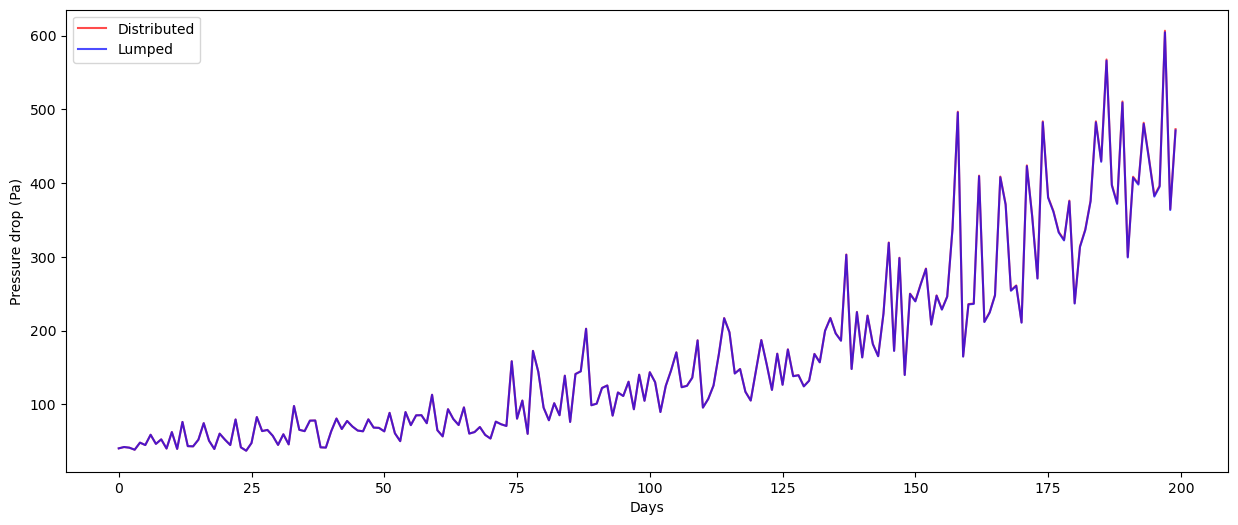

In [24]:
# dP vs. time
plt.figure(figsize=(15, 6))
plt.plot(dfs["dP1"], c="r", alpha=0.7, label="Distributed")
plt.plot(df1["dP1"], c="b", alpha=0.7, label="Lumped")
plt.ylabel("Pressure drop (Pa)")
plt.xlabel("Days")
plt.legend()
plt.show()

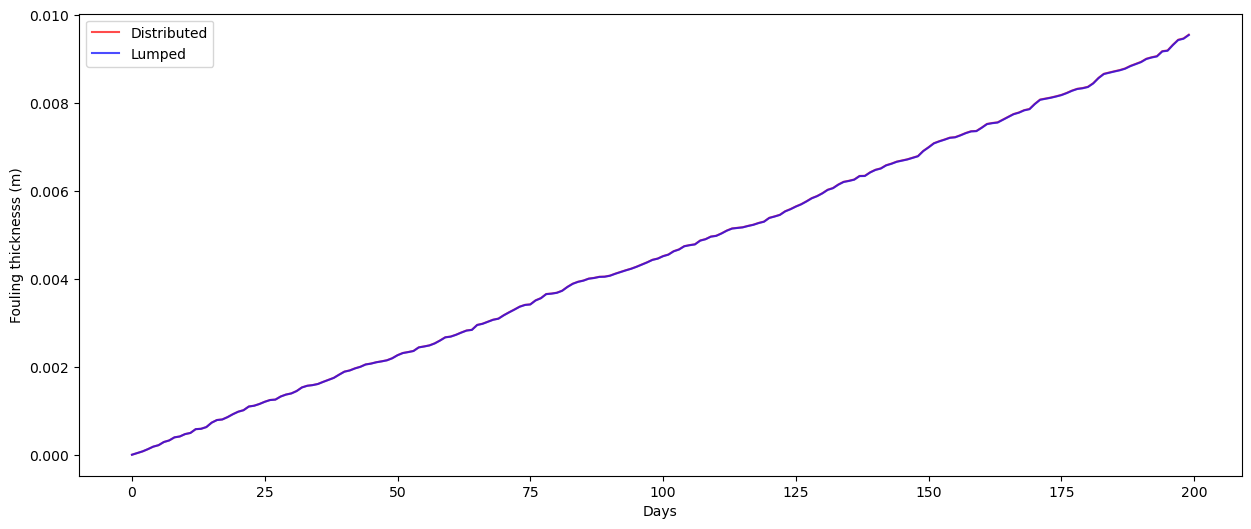

In [25]:
# Fouling thickness vs. time
plt.figure(figsize=(15, 6))
plt.plot(dfs["Sigma1"], c="r", alpha=0.7, label="Distributed")
plt.plot(df1["Sigma1"], c="b", alpha=0.7, label="Lumped")
plt.ylabel("Fouling thicknesss (m)")
plt.xlabel("Days")
plt.legend()
plt.show()

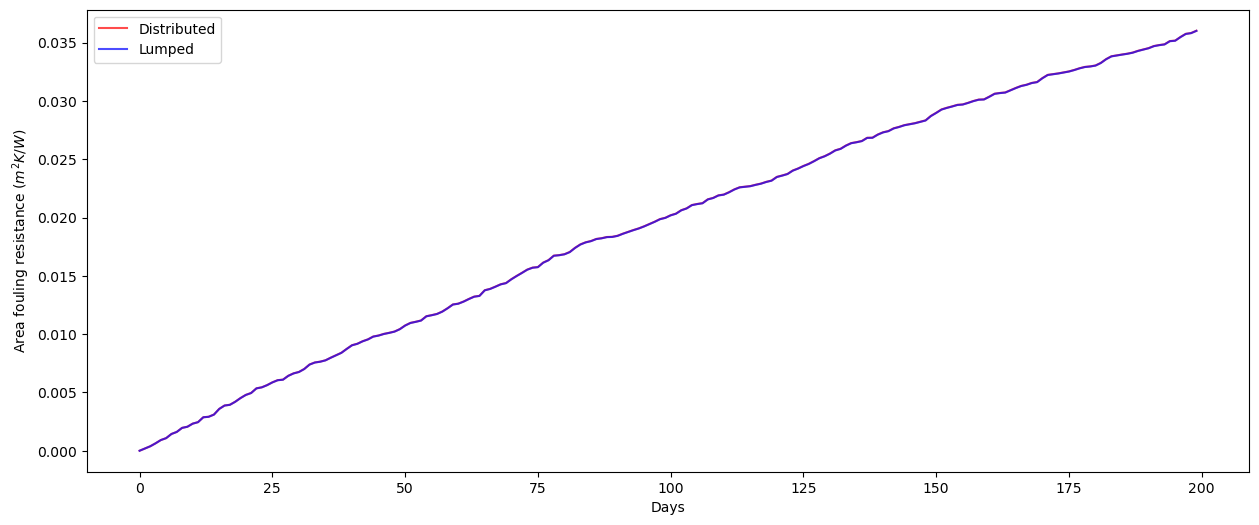

In [26]:
# Fouling resistance vs. time
plt.figure(figsize=(15, 6))
plt.plot(dfs["Rf1"], c="r", alpha=0.7, label="Distributed")
plt.plot(df1["Rf1"], c="b", alpha=0.7, label="Lumped")
plt.ylabel("Area fouling resistance ($m^2 K / W$)")
plt.xlabel("Days")
plt.legend()
plt.show()